<a href="https://colab.research.google.com/github/Yamini-K1810/Arecanut-Disease-Detection-using-CNN/blob/main/ArecanutStem_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip uninstall tensorflow tensorflow-gpu keras tensorboard tf-keras -y


Found existing installation: tensorflow 2.17.1
Uninstalling tensorflow-2.17.1:
  Successfully uninstalled tensorflow-2.17.1
Found existing installation: keras 3.5.0
Uninstalling keras-3.5.0:
  Successfully uninstalled keras-3.5.0
Found existing installation: tensorboard 2.17.1
Uninstalling tensorboard-2.17.1:
  Successfully uninstalled tensorboard-2.17.1
Found existing installation: tf_keras 2.17.0
Uninstalling tf_keras-2.17.0:
  Successfully uninstalled tf_keras-2.17.0


In [ ]:
!pip uninstall protobuf -y

Found existing installation: protobuf 4.25.5
Uninstalling protobuf-4.25.5:
  Successfully uninstalled protobuf-4.25.5


In [ ]:
!pip install protobuf==3.20.*

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 11.3 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-hub 0.16.1 requires tf-keras>=2.14.1, which is not installed.
grpcio-status 1.62.3 requires protobuf>=4.21.6, but you have protobuf 3.20.3 which is incompatible.


In [ ]:
!pip install tensorflow==2.8.0


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 497.6/497.6 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.5/462.5 kB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 19.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 43.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 53.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 35.0 MB/s eta 0:00:00
  Attempting uninstall: tensorboard-data-server
    Found existing installation: tensorboard-data-server 0.7.2
    Uninstalling tensorboard-data-server-0.7.2:
      Successfully uninstalled tensorboard-data-server-0.7.2
  Attempting uninstall: google-auth-oauthlib
    Found existing installation: google-auth-oauthlib 1.2.1
    Uninstalling google-auth-oauthlib-1.2.1:
      Successfully uninstalled google-auth-oauthlib-1.2.1
ERROR: pip's dependen

In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D, Dropout
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from keras.preprocessing import image
from tensorflow.keras.applications import VGG19
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.8.0


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!unzip /content/ArecanutStem.zip

Mounted at /content/drive
Archive:  /content/ArecanutStem.zip
   creating: ArecanutStem/
   creating: ArecanutStem/Healthy_Trunk/
  inflating: ArecanutStem/Healthy_Trunk/Healthy (1).jpeg  
  inflating: ArecanutStem/Healthy_Trunk/Healthy (1).jpg  
  inflating: ArecanutStem/Healthy_Trunk/Healthy (10).jpg  
  inflating: ArecanutStem/Healthy_Trunk/Healthy (11).jpg  
  inflating: ArecanutStem/Healthy_Trunk/Healthy (14).jpg  
  inflating: ArecanutStem/Healthy_Trunk/Healthy (15).jpg  
  inflating: ArecanutStem/Healthy_Trunk/Healthy (16).jpg  
  inflating: ArecanutStem/Healthy_Trunk/Healthy (17).jpg  
  inflating: ArecanutStem/Healthy_Trunk/Healthy (18).jpg  
  inflating: ArecanutStem/Healthy_Trunk/Healthy (19).jpg  
  inflating: ArecanutStem/Healthy_Trunk/Healthy (2).jpg  
  inflating: ArecanutStem/Healthy_Trunk/Healthy (20).jpg  
  inflating: ArecanutStem/Healthy_Trunk/Healthy (21).jpg  
  inflating: ArecanutStem/Healthy_Trunk/Healthy (23).jpg  
  inflating: ArecanutStem/Healthy_Trunk/Health

In [ ]:
img_width = 64
img_height = 64

In [ ]:
datagen = ImageDataGenerator(rescale=1/255.0, validation_split=0.2)

In [ ]:
train_data_generator = datagen.flow_from_directory(directory='/content/ArecanutStem',
                                                   target_size = (img_width, img_height),
                                                   class_mode = 'binary',
                                                   batch_size = 16,
                                                   subset = 'training'
                                                  )

Found 76 images belonging to 2 classes.


In [ ]:
validation_data_generator = datagen.flow_from_directory(directory='/content/ArecanutStem',
                                                   target_size = (img_width, img_height),
                                                   class_mode = 'binary',
                                                   batch_size = 16,
                                                   subset = 'validation'
                                                  )

Found 18 images belonging to 2 classes.


In [ ]:
model = Sequential()

model.add(Conv2D(16, (3,3), input_shape = (img_width, img_height, 3), activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))

model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 16)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 31, 31, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 14, 14, 32)        0

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [ ]:
history = model.fit_generator(generator=train_data_generator,
                              steps_per_epoch = len(train_data_generator),
                              epochs = 30,
                              validation_data = validation_data_generator,
                              validation_steps = len(validation_data_generator))
model.save('arecanut_leaf_vgg19.h5')

<ipython-input-15-dc9f18ce42ce>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(generator=train_data_generator,


Epoch 1/30
5/5 [==============================] - 5s 933ms/step - loss: 0.6558 - accuracy: 0.6184 - val_loss: 0.6060 - val_accuracy: 0.6667
Epoch 2/30
5/5 [==============================] - 3s 472ms/step - loss: 0.5896 - accuracy: 0.6974 - val_loss: 0.5840 - val_accuracy: 0.6667
Epoch 3/30
5/5 [==============================] - 2s 540ms/step - loss: 0.6849 - accuracy: 0.6316 - val_loss: 0.5977 - val_accuracy: 0.6667
Epoch 4/30
5/5 [==============================] - 2s 457ms/step - loss: 0.5538 - accuracy: 0.7237 - val_loss: 0.5876 - val_accuracy: 0.6667
Epoch 5/30
5/5 [==============================] - 2s 454ms/step - loss: 0.5508 - accuracy: 0.7763 - val_loss: 0.5630 - val_accuracy: 0.6667
Epoch 6/30
5/5 [==============================] - 3s 694ms/step - loss: 0.4689 - accuracy: 0.7500 - val_loss: 0.5607 - val_accuracy: 0.7222
Epoch 7/30
5/5 [==============================] - 2s 473ms/step - loss: 0.4833 - accuracy: 0.7368 - val_loss: 0.5148 - val_accuracy: 0.7222
Epoch 8/30
5/5 [====

In [ ]:
history.history

{'loss': [0.65584397315979,
  0.5895782709121704,
  0.6849161386489868,
  0.5537646412849426,
  0.5508265495300293,
  0.4688672423362732,
  0.4833160638809204,
  0.4698629379272461,
  0.38122668862342834,
  0.3190831243991852,
  0.428505003452301,
  0.3385205566883087,
  0.3228422999382019,
  0.311926931142807,
  0.2860851585865021,
  0.2714208662509918,
  0.23341535031795502,
  0.19553713500499725,
  0.22332598268985748,
  0.19180971384048462,
  0.186379075050354,
  0.14232861995697021,
  0.13606399297714233,
  0.14595527946949005,
  0.0936213955283165,
  0.08702478557825089,
  0.12379422038793564,
  0.11714451014995575,
  0.07812388241291046,
  0.06802453100681305],
 'accuracy': [0.6184210777282715,
  0.6973684430122375,
  0.6315789222717285,
  0.7236841917037964,
  0.7763158082962036,
  0.75,
  0.7368420958518982,
  0.8552631735801697,
  0.8684210777282715,
  0.8684210777282715,
  0.8289473652839661,
  0.8684210777282715,
  0.9078947305679321,
  0.8947368264198303,
  0.9078947305679

In [ ]:
predict = model.predict_generator(validation_data_generator, steps=len(validation_data_generator))

<ipython-input-17-547e2b9c4fe8>:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predict = model.predict_generator(validation_data_generator, steps=len(validation_data_generator))


In [ ]:
for i in predict:
  print(i)

[0.99367666]
[0.90456474]
[0.9578569]
[0.9218014]
[0.9853425]
[0.99459326]
[0.98477757]
[0.8953855]
[0.98985267]
[0.99884033]
[0.1957201]
[0.99333525]
[0.9898088]
[0.9755834]
[0.95013285]
[0.8354542]
[0.03801441]
[0.99797595]


In [ ]:
rounded_predict = np.rint(predict)
print(rounded_predict)

[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]]


In [ ]:
from sklearn.metrics import confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[ 0  6]
 [ 2 10]]


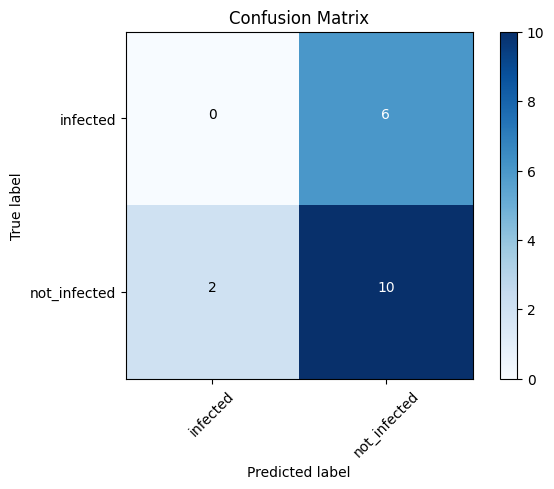

In [ ]:
cm = confusion_matrix(y_true=validation_data_generator.labels, y_pred=rounded_predict)
cm_plot_labels = ['infected','not_infected']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [ ]:
def plot_learningCurve(history, epoch):
  # Plot training & validation accuracy values
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()


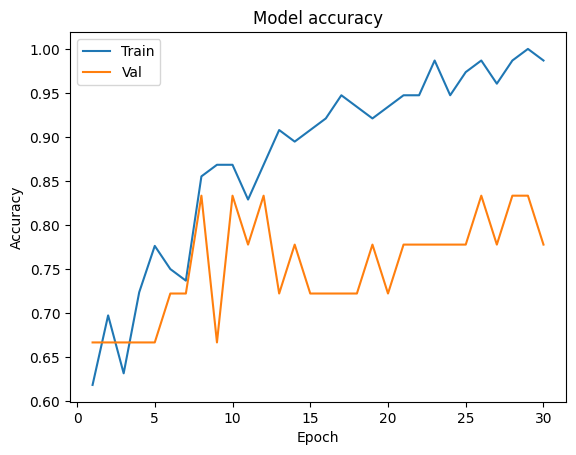

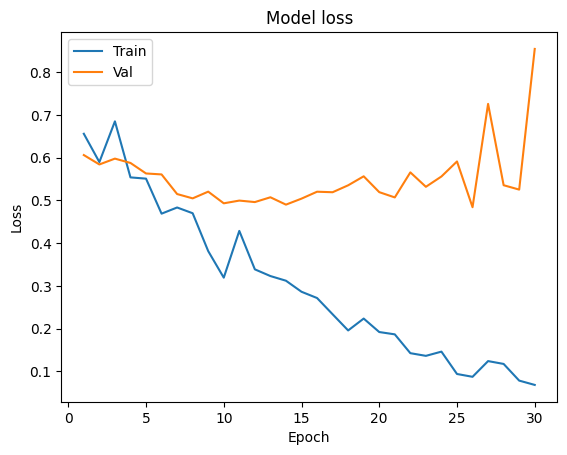

In [ ]:
plot_learningCurve(history, 30)

In [ ]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_true=validation_data_generator.labels, y_pred=rounded_predict)


0.625

In [ ]:
recall_score(y_true=validation_data_generator.labels, y_pred=rounded_predict)


0.8333333333333334

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_true=validation_data_generator.labels, y_pred=rounded_predict)

0.7142857142857143

In [ ]:
model = load_model('arecanut_leaf_vgg19.h5')

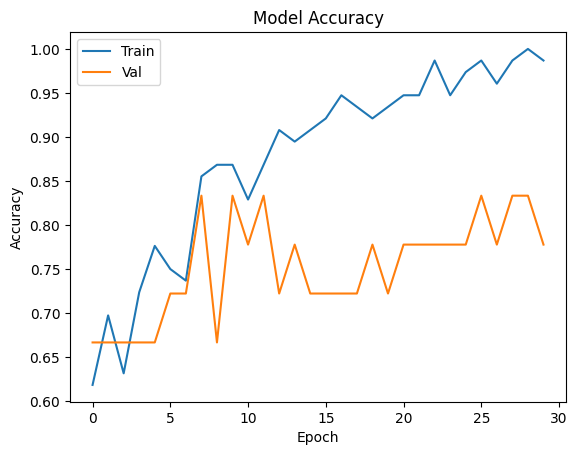

In [ ]:
#Visualize model accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc = 'upper left')
plt.show()

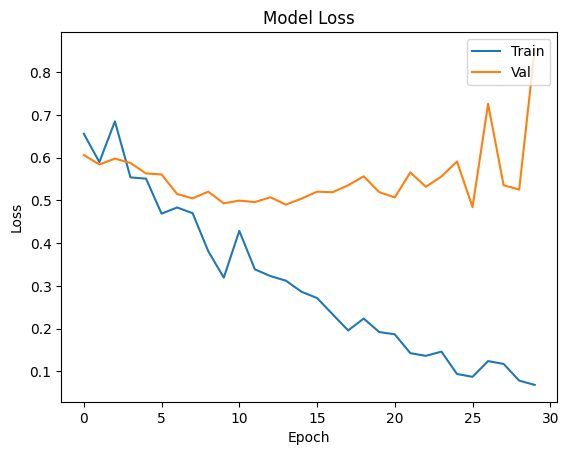

In [ ]:
#Visualize model loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc = 'upper right')
plt.show()

In [ ]:
image = load_img('/content/ArecanutStem/Healthy_Trunk/Healthy (19).jpg', target_size=(64, 64))
image = img_to_array(image) / 255.0
image = np.expand_dims(image, axis=0)

# Predict
prediction = model.predict(image)
print("Infected" if prediction > 0.5 else "Healthy")

Healthy


In [ ]:
image = load_img('/content/ArecanutStem/Stem_bleeding/diseased (18).jpeg', target_size=(64, 64))
image = img_to_array(image) / 255.0
image = np.expand_dims(image, axis=0)

# Predict
prediction = model.predict(image)
print("Infected" if prediction > 0.5 else "Healthy")

Infected
